In [14]:
# XOR gate using Numpy
import numpy as np
# input: XOR gate, type: ndaaray

n1 = 4
n2 = 1
feature_num = 2 
input_num = 4
learning_rate = 0.1
epoch_num = 5000

# we only have 4 training data.
Input_arry = np.array([[0,0],[0,1],[1,0],[1,1]]).T
print("shape_Input_array", Input_arry.shape)
Output_array=np.array([0,1,1,0]).reshape(n2, input_num)
print("output_array.shape", Output_array, Output_array.shape)


# 1.Random initialization of weights
np.random.seed(314)
theta1=np.random.rand(n1,feature_num)
theta2=np.random.rand(n2,n1)

shape_Input_array (2, 4)
output_array.shape [[0 1 1 0]] (1, 4)


In [28]:
def sigmoid(x):
   return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

# 2. Forward Propogation, 1 layer NN (2 input,4 hidden layer, 1 output)
def forward_run(theta1, theta2, Input_arry):
    # print("theta1 in forward", theta1)
    # print("Input in Forwar", Input_arry, Input_arry.shape)
    z1=np.dot(theta1, Input_arry) # z1=theta1*Input_arry  (n1,feature_num)*(feature_num,input_num)
    print("z1", z1, z1.shape)
    a1=sigmoid(z1) # shape: (n1,input_num)
    # print("a1",a1, a1.shape)
    z2=np.dot(theta2, a1)
    # print("z2", z2, z2.shape)
    a2=sigmoid(z2)
    # print("a2", a2, a2.shape)
    return a2,z2, a1,z1# shape:(n2,input_num)

def loss(y):
    loss_sum=np.sum((y-Output_array) ** 2)
    # print("loss sum =", loss_sum)
    # loss_sum = -(1/2)*np.sum(Output_array*np.log(y)+(1-Output_array)*np.log(1-y))
    return  loss_sum

def loss_der(y):
    return (y-Output_array)

def back_prop(theta2,a2,z2,a1,z1):
    #updata theta2 
    z2_der=loss_der(a2)*sigmoid_der(z2)
    # z2_der = a2 - Output_array
    # print("loss_der(a2)", loss_der(a2),"sigmoid_der(z2)", sigmoid_der(z2))
    # print("z2_der",  z2_der, " a1.T",  a1.T)
    diff_theta2=np.dot(z2_der, a1.T)
    # print("np.dot(z2_der, a1.T)",diff_theta2)
    # print('theta2.T=', theta2.T, theta2.T.shape)
    a1_der=np.dot(theta2.T, z2_der)
    # print('a1_der=', a1_der, a1_der.shape)
    z1_der=a1_der*sigmoid_der(z1)
    # print('sigmoid_der(z1)', sigmoid_der(z1), 'z1_der', z1_der)
    diff_theta1=np.dot(z1_der, Input_arry.T)
    # print('diff_theta1', diff_theta1)
    return  diff_theta1, diff_theta2
 

z1 [[ 0.          3.3127096   3.33816222  6.65087183]
 [ 0.          4.57136595 -2.18765313  2.38371282]
 [ 0.          3.9262091   3.93262679  7.85883589]
 [ 0.         -2.18743807  4.57296826  2.38553019]] (4, 4)
z1 [[ 0.          3.31286399  3.33831307  6.65117706]
 [ 0.          4.57172701 -2.18793344  2.38379357]
 [ 0.          3.92633908  3.93275609  7.85909517]
 [ 0.         -2.18771862  4.57332898  2.38561036]] (4, 4)
z1 [[ 0.          3.3130183   3.33846384  6.65148214]
 [ 0.          4.57208784 -2.18821361  2.38387423]
 [ 0.          3.92646899  3.93288534  7.85935432]
 [ 0.         -2.18799902  4.57368948  2.38569046]] (4, 4)
z1 [[ 0.          3.31317254  3.33861454  6.65178708]
 [ 0.          4.57244846 -2.18849363  2.38395482]
 [ 0.          3.92659883  3.93301451  7.85961334]
 [ 0.         -2.18827927  4.57404976  2.38577049]] (4, 4)
z1 [[ 0.          3.31332671  3.33876516  6.65209187]
 [ 0.          4.57280885 -2.18877351  2.38403534]
 [ 0.          3.92672861  3.933143

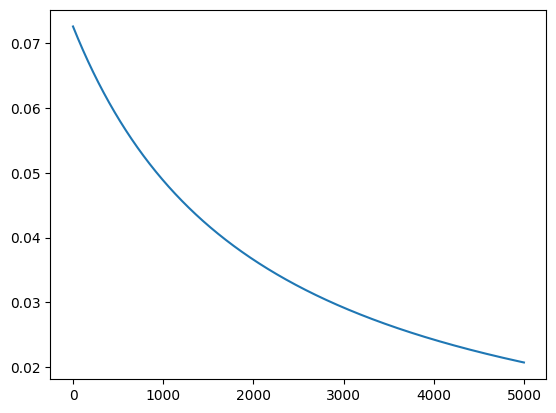

In [30]:
Loss = []
for trail in range(epoch_num):
    # 3. forward
    a2,z2,a1,z1=forward_run(theta1, theta2, Input_arry)
    loss_val = loss(a2) # 
    # print("trail=", trail,"loss=", loss_val)
    # 4.Back Propagation
    d_theta1, d_theta2 =back_prop(theta2,a2,z2,a1,z1)
    theta2 = theta2 - learning_rate* d_theta2
    # print("theta2_update 1 time= ", theta2, theta2.shape,learning_rate* diff_theta[1] )
    theta1 = theta1 - learning_rate*d_theta1
    # print("theta1=", theta1, "theta2=", theta2)
    Loss.append(loss_val)
import matplotlib.pyplot as plt
#plot the Loss over the trail
plt.plot(Loss)
plt.show()    

In [31]:
def predict(w1,w2,input):
    z1,a1,z2,a2 = forward_run(theta1,theta2,input)
    a2 = np.squeeze(a2)
    if a2>=0.5:
        print("For input", [i[0] for i in input], "output is 1")# ['{:.2f}'.format(i) for i in x])
    else:
        print("For input", [i[0] for i in input], "output is 0")

In [32]:
test = np.array([[1],[0]])
predict(theta1,theta2,test)
test = np.array([[0],[0]])
predict(theta1,theta2,test)
test = np.array([[0],[1]])
predict(theta1,theta2,test)
test = np.array([[1],[1]])
predict(theta1,theta2,test)

z1 [[ 3.71181871]
 [-2.84989709]
 [ 4.24700823]
 [ 5.33456236]] (4, 1)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()